In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from freeze_graph import freeze_graph

/home/isai/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
TESTS = 200 #len(mnist.validation.images)
LEARNING_RATE = 0.5

# x and y coordinates to plot 
x_coordinates = np.linspace(0, TESTS, num=TESTS)
loss_y_coordinates = np.zeros(TESTS)
accuracy_y_coordinates = np.zeros(TESTS)

def plot(x, y, limits, title, x_label_name, y_label_name):
    plt.close("all")
    figure = plt.figure()
    figure.clf()
    
    plt.plot(x, y)
    
    #plt.axis(limits)
    plt.ylabel(y_label_name)
    plt.xlabel(x_label_name)

    figure.suptitle(title, fontsize=20)
    plt.legend(loc='upper right')
    
    plt.show()
    return

def scatter(x, y, limits, title, x_label_name, y_label_name):
    plt.close("all")
    figure = plt.figure()
    figure.clf()
    
    plt.scatter(x, y)
    
    #plt.axis(limits)
    plt.ylabel(y_label_name)
    plt.xlabel(x_label_name)

    figure.suptitle(title, fontsize=20)
    plt.legend(loc='upper right')
    
    plt.show()
    return

def plot_cross_entropy():
    limits = [0,TESTS,0,5]
    plot(x_coordinates, loss_y_coordinates, limits, "Validation Set Cross Entropy", "Validation Images", "Entropy")  
    return

def plot_accuracy():
    limits = [0,TESTS,0,1]
    scatter(x_coordinates, accuracy_y_coordinates, limits, "Validation Set Accuracy", "Validation Images", "Accuracy")
    return

In [4]:
def weight_variable(shape,name):
    gaussian_matrix = tf.truncated_normal(shape, stddev=0.1)
    weight_matrix = tf.Variable(gaussian_matrix, name=name)
    return weight_matrix

def bias_variable(shape,name):
    gaussian_vector = tf.truncated_normal(shape, stddev=0.1)
    bias_vector = tf.Variable(gaussian_vector, name=name)
    return bias_vector


FEATURES = 784
HIDDEN_NODES = 20
CLASSES = 10

with tf.Graph().as_default():

    with tf.name_scope("input_layer"):
        features_matrix = tf.placeholder(tf.float32, [None, FEATURES], name="features_matrix")
        targets_matrix = tf.placeholder(tf.float32, [None, CLASSES], name="targets_matrix")

    with tf.name_scope("hidden_layer1"):
        # hidden inputs
        weight_matrix_h1 = weight_variable([FEATURES, HIDDEN_NODES], name="weight_matrix_h1")
        bias_vector_h1 = bias_variable([HIDDEN_NODES], name="bias_vector_h1")

        # linear operation
        hidden_matrix_linear_h1 = tf.matmul(features_matrix, weight_matrix_h1, name = "input_node") + bias_vector_h1

        # nonlinear operations
        hidden_matrix_nonlinear_h1 = tf.nn.relu(hidden_matrix_linear_h1, name="hidden_matrix_nonlinear_h1")


    with tf.name_scope("hidden_layer2"):
        # hidden inputs
        weight_matrix_h2 = weight_variable([HIDDEN_NODES, HIDDEN_NODES], name="weight_matrix_h2")
        bias_vector_h2 = bias_variable([HIDDEN_NODES], name="bias_vector_h2")

        # linear operation
        hidden_matrix_linear_h2 = tf.matmul(hidden_matrix_nonlinear_h1, weight_matrix_h2, name="hidden_matrix_linear_h2") + bias_vector_h2

        # nonlinear operations
        hidden_matrix_nonlinear_h2 = tf.nn.relu(hidden_matrix_linear_h2, name="hidden_matrix_nonlinear_h2")


    with tf.name_scope("hidden_layer3"):
        # hidden inputs
        weight_matrix_h3 = weight_variable([HIDDEN_NODES, HIDDEN_NODES], name="weight_matrix_h3")
        bias_vector_h3 = bias_variable([HIDDEN_NODES], name="bias_vector_h3")

        # linear operation
        hidden_matrix_linear_h3 = tf.matmul(hidden_matrix_nonlinear_h2, weight_matrix_h3, name="hidden_matrix_linear_h3") + bias_vector_h3

        # nonlinear operations
        hidden_matrix_nonlinear_h3 = tf.nn.relu(hidden_matrix_linear_h3, name="hidden_matrix_nonlinear_h3")


    with tf.name_scope("output_layer"):
        # hidden inputs
        weight_matrix_out = weight_variable([HIDDEN_NODES, CLASSES], name="weight_matrix_out")
        bias_vector_out = bias_variable([CLASSES], name="bias_vector_out")

        # linear operation
        output_matrix = tf.matmul(hidden_matrix_nonlinear_h3, weight_matrix_out, name="output_matrix") + bias_vector_out

        # making output matrix a matrix of probabilities
        probabilities_matrix = tf.nn.softmax(output_matrix, name = "output_node")

    with tf.name_scope("loss"):
        loss_function = tf.reduce_mean(-tf.reduce_sum(targets_matrix * tf.log(probabilities_matrix), reduction_indices=[1]), name="loss_function")
        train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss_function)
        
    with tf.name_scope("loss"):
        predictions_vector = tf.equal(tf.argmax(targets_matrix,1), tf.argmax(probabilities_matrix,1), name="predictions_vector")
        accuracy = tf.reduce_mean(tf.cast(predictions_vector, tf.float32), name="accuracy_function")
        
        
    sess = tf.Session() 
    init = tf.initialize_all_variables()
    sess.run(init)
    
    EPOCHS = 1000

    for epoch in range(EPOCHS):
        features_matrix_train, targets_matrix_train = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={features_matrix: features_matrix_train, targets_matrix: targets_matrix_train})

        features_matrix_test, targets_matrix_test = mnist.test.images, mnist.test.labels
        loss_scalar = sess.run(loss_function, feed_dict={features_matrix: features_matrix_test, targets_matrix: targets_matrix_test})
        accuracy_scalar = sess.run(accuracy, feed_dict={features_matrix: features_matrix_test, targets_matrix: targets_matrix_test})

        #loss_y_coordinates[epoch] = loss_scalar
        #accuracy_y_coordinates[epoch] = accuracy_scalar
        
    path = "./VanillaNet_TrainedModel/"
    checkpoint_prefix = path + "saved_checkpoint"
    checkpoint_state_name = "checkpoint_state"
    graph_filename = "input_graph.pb"
    trained_graph_filename = "trained_graph.pb"


    saver = tf.train.Saver()
    saver.save(sess, checkpoint_prefix)
    tf.train.write_graph(sess.graph.as_graph_def(), path, graph_filename)

# We save out the graph to disk, and then call the const conversion
# routine.
input_graph_path = path + graph_filename
input_saver_def_path = ""
input_binary = False
input_checkpoint_path = checkpoint_prefix 
output_node_names = "output_layer/output_node"
restore_op_name = "save/restore_all"
filename_tensor_name = "save/Const:0"
output_graph_path = path + trained_graph_filename
clear_devices = False

freeze_graph(input_graph_path, 
             input_saver_def_path,
             input_binary, 
             input_checkpoint_path,
             output_node_names, 
             restore_op_name,
             filename_tensor_name, 
             output_graph_path,
             clear_devices,
             None)

Converted 8 variables to const ops.
29 ops in the final graph.


In [5]:
# Now we make sure the variable is now a constant, and that the graph still
# produces the expected result.
output_graph_path = "./VanillaNet_TrainedModel/trained_graph.pb"

with tf.Graph().as_default() as this_graph:
    output_graph_def = tf.GraphDef()
    with open(output_graph_path, "rb") as f:
        output_graph_def.ParseFromString(f.read())
        _ = tf.import_graph_def(output_graph_def, name="")

    with tf.Session() as sess:
       
        for test in range(TESTS):
            features = mnist.validation.images[test].reshape((1,784))
            target = mnist.validation.labels[test].reshape((1,10))

            predictions_vector = sess.graph.get_tensor_by_name("output_layer/output_node:0")
            prediction = sess.run(predictions_vector, feed_dict={"input_layer/features_matrix:0": features})
            accuracy = np.argmax(target) == np.argmax(prediction)
            accuracy_y_coordinates[test] = accuracy  
            
        tf.merge_all_summaries()
        tf.train.SummaryWriter('./VanillaNet_TensorBoard/After_Serializing_Model',graph=this_graph)
            
            
#graph_path = "./VanillaNet_TrainedModel/trained_graph.pb"
#with tf.Graph().as_default():
#    graph_def = tf.GraphDef()
#    with open(graph_path, "rb") as graph_file:
#        graph_def.ParseFromString(graph_file.read())
#        tf.import_graph_def(graph_def, name="uploaded_graph")

/home/isai/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


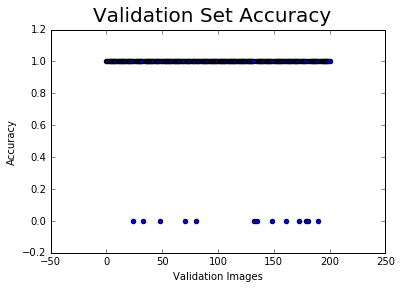

In [6]:
plot_accuracy()